<a href="https://colab.research.google.com/github/isratrimii/Machine-Learning/blob/main/Clustering/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Clustering and hierarchical clustering are both unsupervised learning techniques used to group similar data points together based on certain characteristics or patterns. However, they differ in approach and use cases.

# 1. Clustering

Clustering is the process of dividing a dataset into distinct groups, or clusters, where data points in the same cluster are more similar to each other than to those in other clusters.

**Popular Methods:**

1. **K-means**: Partitions data into K clusters by minimizing the variance within each cluster.
2. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Groups data points based on density, which helps detect clusters of varying shapes and sizes. Also identifies outliers as noise.
3. **Gaussian Mixture Models (GMM)**: Assumes data is generated from a mixture of several Gaussian distributions and clusters by maximizing the likelihood of the data given these distributions.

**When to Use:** Clustering is useful for finding patterns in data when there are no predefined labels. It’s used in customer segmentation, image compression, and document clustering, among other applications.

**Limitations:** Many clustering methods, like K-means, struggle with clusters that are non-spherical or vary in density and size. Additionally, choosing the right number of clusters can be challenging.

# Importing Libraries and Mounting

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/COURSES/ML_CSE432_Lab/11 Clustering/countries_of_the_world.csv')

In [ ]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


# Preprocessing

In [ ]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,3
Infant mortality (per 1000 births),3
GDP ($ per capita),1
Literacy (%),18


**Normalization**

In [ ]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [ ]:
numeric_columns = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']

# Iterate over each column in the DataFrame
for col in numeric_columns:
  try:
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'))
  except:
    pass

df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3,8.71,6.25,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),0.023631,0.037920,0.002950,0.000000,1.000000,0.851138,0.003663,0.223301,0.002897,0.195299,0.004341,0.814759,1,0.904926,0.657559,0.494148,0.248307,0.356502
1,Albania,EASTERN EUROPE,0.002720,0.001683,0.007658,0.001447,0.364586,0.101800,0.073260,0.836165,0.068573,0.339559,0.087214,0.617369,3,0.180018,0.106740,0.301691,0.189616,0.579596
2,Algeria,NORTHERN AFRICA,0.025056,0.139485,0.000848,0.000046,0.467650,0.151985,0.100733,0.635922,0.075237,0.051844,0.004933,0.947953,1,0.226750,0.084517,0.131339,0.654628,0.264574
3,American Samoa,OCEANIA,0.000039,0.000012,0.017847,0.066949,0.006356,0.036951,0.137363,0.963592,0.250435,0.161005,0.295975,0.625019,2,0.349217,0.035701,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,0.000049,0.000027,0.009348,0.000000,0.626334,0.009317,0.338828,1.000000,0.480008,0.035743,0.000000,0.966702,3,0.032689,0.144262,NaN,NaN,NaN


# Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(df[numeric_columns])

# Add cluster labels to the DataFrame
df['DBSCAN_Cluster'] = clusters

# Analyze the results (e.g., count the number of points in each cluster)
print(df['DBSCAN_Cluster'].value_counts())

ValueError: Input X contains NaN.
DBSCAN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
!pip install hdbscan

In [ ]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5) # Adjust min_cluster_size as needed
clusterer.fit(df[numeric_columns])
df['HDBSCAN_cluster'] = clusterer.labels_
df

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,HDBSCAN_cluster
0,Afghanistan,ASIA (EX. NEAR EAST),0.023631,0.037920,0.002950,0.000000,1.000000,0.851138,0.003663,0.223301,...,0.195299,0.004341,0.814759,1,0.904926,0.657559,0.494148,0.248307,0.356502,-1
1,Albania,EASTERN EUROPE,0.002720,0.001683,0.007658,0.001447,0.364586,0.101800,0.073260,0.836165,...,0.339559,0.087214,0.617369,3,0.180018,0.106740,0.301691,0.189616,0.579596,1
2,Algeria,NORTHERN AFRICA,0.025056,0.139485,0.000848,0.000046,0.467650,0.151985,0.100733,0.635922,...,0.051844,0.004933,0.947953,1,0.226750,0.084517,0.131339,0.654628,0.264574,-1
3,American Samoa,OCEANIA,0.000039,0.000012,0.017847,0.066949,0.006356,0.036951,0.137363,0.963592,...,0.161005,0.295975,0.625019,2,0.349217,0.035701,NaN,NaN,NaN,-1
4,Andorra,WESTERN EUROPE,0.000049,0.000027,0.009348,0.000000,0.626334,0.009317,0.338828,1.000000,...,0.035743,0.000000,0.966702,3,0.032689,0.144262,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,0.001867,0.000343,0.025806,0.000000,0.544154,0.091742,0.005495,NaN,...,0.272098,0.374309,0.461977,3,0.561234,0.059381,0.117035,0.293454,0.636771,-1
223,Western Sahara,NORTHERN AFRICA,0.000202,0.015578,0.000061,0.000482,NaN,NaN,NaN,NaN,...,0.000322,0.000000,0.999700,1,NaN,NaN,NaN,NaN,0.378924,-1
224,Yemen,NEAR EAST,0.016324,0.030920,0.002495,0.000413,0.476504,0.313446,0.005495,0.395631,...,0.044759,0.004736,0.954702,1,0.819521,0.218944,0.175553,0.510158,0.371076,-1
225,Zambia,SUB-SAHARAN AFRICA,0.008748,0.044076,0.000940,0.000000,0.476504,0.455267,0.005495,0.764563,...,0.113991,0.000592,0.893505,2,0.776013,0.642623,0.286086,0.304740,0.478700,0


In [ ]:
print(df['HDBSCAN_cluster'].value_counts())

HDBSCAN_cluster
-1    115
 1     92
 0     20
Name: count, dtype: int64


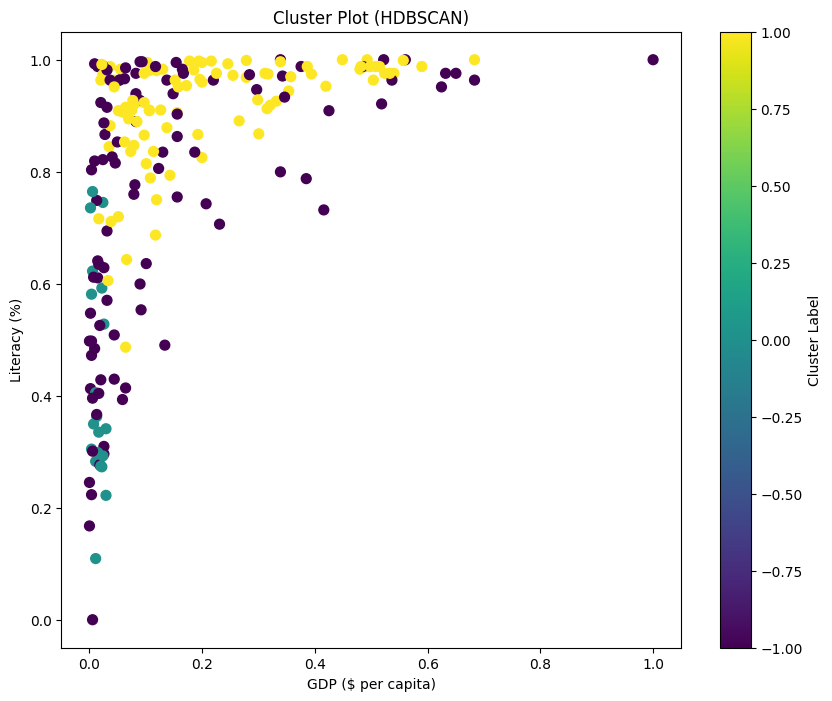

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.scatter(df['GDP ($ per capita)'], df['Literacy (%)'], c=df['HDBSCAN_cluster'], cmap='viridis', s=50)
plt.xlabel('GDP ($ per capita)')
plt.ylabel('Literacy (%)')
plt.title('Cluster Plot (HDBSCAN)')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
unique_hdb_clusters = df['HDBSCAN_cluster'].unique()
unique_hdb_clusters

array([-1,  1,  0])

In [ ]:
cluster_groups = df.groupby('HDBSCAN_cluster')

# Iterate through each cluster and print the countries
for cluster_label, cluster_data in cluster_groups:
    print(f"Cluster {cluster_label}:")
    countries = cluster_data['Country'].tolist()
    print(countries)
    print()

Cluster -1:
['Afghanistan ', 'Algeria ', 'American Samoa ', 'Andorra ', 'Angola ', 'Anguilla ', 'Australia ', 'Azerbaijan ', 'Bahamas, The ', 'Bangladesh ', 'Bermuda ', 'Bosnia & Herzegovina ', 'Botswana ', 'Brazil ', 'British Virgin Is. ', 'Burma ', 'Burundi ', 'Cambodia ', 'Canada ', 'Cayman Islands ', 'China ', 'Comoros ', 'Congo, Repub. of the ', 'Cook Islands ', "Cote d'Ivoire ", 'Cyprus ', 'Denmark ', 'Djibouti ', 'Dominica ', 'East Timor ', 'El Salvador ', 'Equatorial Guinea ', 'Eritrea ', 'Faroe Islands ', 'Gabon ', 'Gaza Strip ', 'Ghana ', 'Gibraltar ', 'Greenland ', 'Grenada ', 'Guam ', 'Guernsey ', 'Guinea-Bissau ', 'Guyana ', 'Haiti ', 'Hong Kong ', 'India ', 'Indonesia ', 'Iraq ', 'Isle of Man ', 'Jersey ', 'Kenya ', 'Kiribati ', 'Korea, North ', 'Kuwait ', 'Lesotho ', 'Liberia ', 'Luxembourg ', 'Macau ', 'Macedonia ', 'Malawi ', 'Malaysia ', 'Maldives ', 'Marshall Islands ', 'Mayotte ', 'Micronesia, Fed. St. ', 'Moldova ', 'Monaco ', 'Montserrat ', 'Morocco ', 'Mozambique

# Task

Apply k-Means and k-Medoid Clustering